In [4]:
from PIL import Image
from PIL import Image, ImageFilter
from PIL import Image, ImageEnhance
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.image as ig
from matplotlib import pyplot as plt
from __future__ import absolute_import, division, print_function
from collections import Counter
from PIL import Image
import tensorflow as tf
from __future__ import absolute_import, division, print_function
from collections import Counter
import io

In [5]:
import pandas as pd
import os
def get_csv_data(video_folder_name, fileName):    
    data = pd.read_csv(fileName, sep=';')
    data.columns = ['ID', 'file_name', 'cut_frame']
    file_paths = []
    for entry in data.iloc():
        file_paths.append(video_folder_name + entry['file_name'])
    data['file_path'] = file_paths
    data.set_index('ID', inplace=True, drop=True)
#     data["cut_frame"] = pd.to_numeric(data["cut_frame"])
    return data


def get_videos_from_folder(video_folder_name):
    video_files = []
    for root, dirs, files in os.walk(video_folder_name):
        for filename in files:
            if '.mp4' in filename:
                video_files.append({"file_name": filename, "file_path": video_folder_name + filename})
    data = pd.DataFrame(video_files, columns=['file_name', 'file_path'])
    return data

training = get_csv_data('../WS2020_DeepLearning_Videos/Task2_Training_Validation/', '../Task2_Training.csv')
test = get_csv_data('../WS2020_DeepLearning_Videos/Task2_Test/', '../Task2_Test.csv')

training.dropna(inplace=True)
test.dropna(inplace=True)

display(training)
display(test)

,file_name,cut_frame,file_path
ID,,,
1,_8Vy3dlHg2w_00132.mp4,63.0,../WS2020_DeepLearning_Videos/Task2_Training_V...
2,_8Vy3dlHg2w_00133.mp4,25.0,../WS2020_DeepLearning_Videos/Task2_Training_V...
3,_8Vy3dlHg2w_00136.mp4,71.0,../WS2020_DeepLearning_Videos/Task2_Training_V...
4,_8Vy3dlHg2w_00139.mp4,35.0,../WS2020_DeepLearning_Videos/Task2_Training_V...
5,_8Vy3dlHg2w_00142.mp4,20.0,../WS2020_DeepLearning_Videos/Task2_Training_V...
...,...,...,...
296,_tigfCJFLZg_00285.mp4,51.0,../WS2020_DeepLearning_Videos/Task2_Training_V...
297,_tigfCJFLZg_00286.mp4,130.0,../WS2020_DeepLearning_Videos/Task2_Training_V...
298,_tigfCJFLZg_00289.mp4,52.0,../WS2020_DeepLearning_Videos/Task2_Training_V...


,file_name,cut_frame,file_path
ID,,,
1,_tigfCJFLZg_00293.mp4,131.0,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
2,_tigfCJFLZg_00295.mp4,85.0,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
3,_tigfCJFLZg_00298.mp4,93.0,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
4,_tigfCJFLZg_00299.mp4,138.0,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
5,_tigfCJFLZg_00301.mp4,124.0,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
...,...,...,...
86,_tigfCJFLZg_00428.mp4,45.0,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
87,_tigfCJFLZg_00429.mp4,125.0,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...
88,_tigfCJFLZg_00430.mp4,49.0,../WS2020_DeepLearning_Videos/Task2_Test/_tigf...


In [6]:
import cv2
import numpy as np
import math

class_names = ['wet', 'dry']
from scipy.ndimage import rotate


def get_label_for_frame(frame_number, cut_frame):
    if(frame_number >= cut_frame):
        return 0
    else:
        return 1   
    
def get_frames_labels(data):
    frames = []
    labels = []
    videos = []
    
    for file in data.iloc():
        file_path = file['file_path']
        cutframe = file['cut_frame']
        
        # Playing video from file:
        cap = cv2.VideoCapture(file['file_path'])
        totalFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        currentFrame = 0
        success, frame = cap.read()
        

        while(success):
            
            label = get_label_for_frame(currentFrame, cutframe)
            
            
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
           # frame = cv2.resize(frame, (256,256))
           
                
            videos.append(file_path)  
            frames.append(frame)
            labels.append(label)

            currentFrame += 1
            success, frame = cap.read()
            
        cap.release()
        cv2.destroyAllWindows()
    
    return (frames, labels, videos)


training_frames, training_labels, training_video = get_frames_labels(training)
test_frames, test_labels, test_video= get_frames_labels(test)


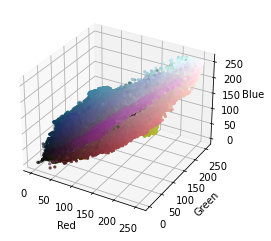

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(training_frames[0])
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")


pixel_colors = training_frames[7].reshape((np.shape(training_frames[7])[0]*np.shape(training_frames[0])[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

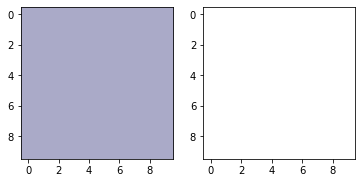

In [10]:
light_white = (170, 170, 200)
dark_white = (255, 255, 255)


lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(lw_square)
plt.subplot(1, 2, 2)
plt.imshow(dw_square)
plt.show()

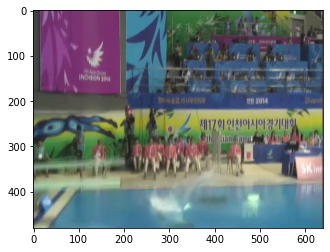

In [11]:
plt.imshow(training_frames[77])

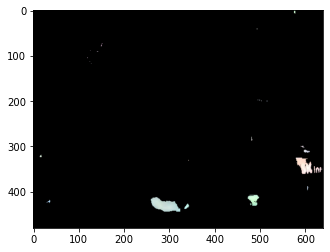

8556


(480, 640, 3)

In [16]:
img= training_frames[77]


mask_white = cv2.inRange(img, light_white, dark_white)
result_white = cv2.bitwise_and(img, img, mask=mask_white)

plt.imshow(result_white)
plt.show()


#count pixels

pixel_count = np.sum(result_white != (0,0,0))
print(pixel_count)

result_white.shape

# Format Image in 2D (Where masked_image != Black)

In [53]:
indices = np.where(result_white!= (0,0,0))
my_coords = []
for  i in range(1,len(indices[0])): 
    x = indices[1][i]
    y = indices[0][i]
    
    my_coords.append((x,y))
       

print(my_coords)

[(576, 0), (576, 0), (577, 0), (577, 0), (577, 0), (578, 0), (578, 0), (578, 0), (576, 1), (576, 1), (576, 1), (577, 1), (577, 1), (577, 1), (578, 1), (578, 1), (578, 1), (576, 2), (576, 2), (576, 2), (577, 2), (577, 2), (577, 2), (578, 2), (578, 2), (578, 2), (576, 3), (576, 3), (576, 3), (577, 3), (577, 3), (577, 3), (578, 3), (578, 3), (578, 3), (576, 4), (576, 4), (576, 4), (577, 4), (577, 4), (577, 4), (578, 4), (578, 4), (578, 4), (576, 5), (576, 5), (576, 5), (577, 5), (577, 5), (577, 5), (578, 5), (578, 5), (578, 5), (576, 6), (576, 6), (576, 6), (577, 6), (577, 6), (577, 6), (578, 6), (578, 6), (578, 6), (578, 7), (578, 7), (578, 7), (494, 40), (494, 40), (494, 40), (494, 41), (494, 41), (494, 41), (494, 42), (494, 42), (494, 42), (152, 73), (152, 73), (152, 73), (152, 74), (152, 74), (152, 74), (151, 76), (151, 76), (151, 76), (150, 77), (150, 77), (150, 77), (151, 77), (151, 77), (151, 77), (150, 78), (150, 78), (150, 78), (151, 78), (151, 78), (151, 78), (150, 80), (150, 80

In [54]:
unique_coordinates = list(set(list(my_coords)))
my_sorted_coord=sorted(unique_coordinates)
print(my_sorted_coord)

[(15, 321), (15, 322), (15, 323), (16, 320), (16, 321), (16, 322), (16, 323), (17, 319), (17, 320), (17, 321), (17, 322), (17, 323), (18, 319), (18, 321), (18, 322), (18, 323), (30, 423), (31, 423), (32, 422), (33, 421), (33, 422), (34, 421), (34, 422), (35, 420), (35, 421), (35, 422), (36, 418), (36, 419), (36, 420), (36, 421), (36, 422), (36, 423), (36, 424), (37, 419), (37, 420), (37, 421), (37, 422), (120, 104), (120, 105), (125, 113), (126, 89), (128, 117), (141, 91), (142, 91), (143, 91), (150, 77), (150, 78), (150, 80), (151, 76), (151, 77), (151, 78), (152, 73), (152, 74), (260, 416), (260, 417), (260, 418), (260, 419), (261, 415), (261, 416), (261, 417), (261, 418), (261, 419), (261, 420), (261, 421), (261, 422), (261, 423), (261, 424), (262, 416), (262, 417), (262, 418), (262, 419), (262, 420), (262, 421), (262, 422), (262, 423), (262, 424), (262, 425), (262, 426), (262, 427), (263, 414), (263, 415), (263, 416), (263, 417), (263, 418), (263, 419), (263, 420), (263, 421), (263

# Clustering mit DBSCAN

[[ 15 321]
 [ 15 322]
 [ 15 323]
 ...
 [637 349]
 [637 350]
 [637 351]]
NUMBER OF CLUSTERS: 4
NUMBER OF NOISES: 119
[-1 -1 -1 ...  2  2  2]
[1351  387  920   75]
[0]


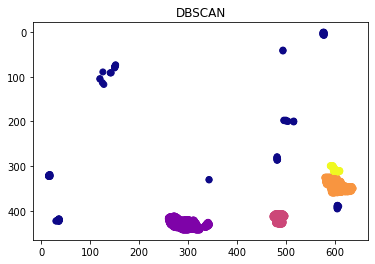

In [79]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def dbscan(X, eps, min_samples):
    #ss = StandardScaler()
    #Xi = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = db.fit_predict(X)
    plt.gca().invert_yaxis()
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='plasma')
    plt.title("DBSCAN")
    labels=db.labels_
    print(X)
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    
    print("NUMBER OF CLUSTERS:",n_clusters_)
    print("NUMBER OF NOISES:",n_noise_)
    print(labels)

    counts = np.bincount(labels[labels>=0])
    print(counts)
    labels1, counts = np.unique(labels[labels>=0], return_counts=True)
    max1 = labels1[np.argsort(-counts)[:1]]
    print(max1)
    cluster = np.array(X[labels == max1])
    df=pd.DataFrame(cluster)
    
    
    return df
    
    
    
df =dbscan(np.array(my_sorted_coord),eps=10, min_samples=40)

In [80]:
# Data of biggest Cluster

print(df)
print(df.describe())

        0    1
0     260  416
1     260  417
2     260  418
3     260  419
4     261  415
...   ...  ...
1346  343  429
1347  343  430
1348  343  431
1349  343  432
1350  344  431

[1351 rows x 2 columns]
                 0            1
count  1351.000000  1351.000000
mean    292.787565   429.578090
std      19.551452     7.408579
min     260.000000   412.000000
25%     276.000000   424.000000
50%     292.000000   430.000000
75%     307.000000   435.000000
max     344.000000   443.000000


[[  0 576]
 [  0 577]
 [  0 578]
 ...
 [443 322]
 [443 323]
 [443 324]]
NUMBER OF CLUSTERS: 4
NUMBER OF NOISES: 119
[-1 -1 -1 ...  3  3  3]
[  75  920  387 1351]
[3]
        0    1
0     412  270
1     412  271
2     412  272
3     412  273
4     413  264
...   ...  ...
1346  443  320
1347  443  321
1348  443  322
1349  443  323
1350  443  324

[1351 rows x 2 columns]
                 0            1
count  1351.000000  1351.000000
mean    429.578090   292.787565
std       7.408579    19.551452
min     412.000000   260.000000
25%     424.000000   276.000000
50%     430.000000   292.000000
75%     435.000000   307.000000
max     443.000000   344.000000


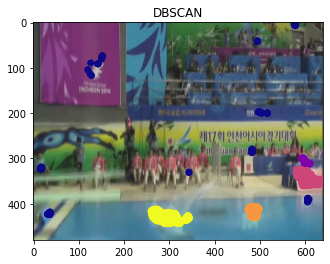

In [21]:
dbscan(np.array(my_sorted_coord),eps=10, min_samples=40)
plt.imshow(result_white)
plt.imshow(training_frames[77])

[[ 15 321]
 [ 15 322]
 [ 15 323]
 ...
 [637 349]
 [637 350]
 [637 351]]
NUMBER OF CLUSTERS: 4
NUMBER OF NOISES: 119
[-1 -1 -1 ...  2  2  2]
[1351  387  920   75]
[0]
        0    1
0     260  416
1     260  417
2     260  418
3     260  419
4     261  415
...   ...  ...
1346  343  429
1347  343  430
1348  343  431
1349  343  432
1350  344  431

[1351 rows x 2 columns]
                 0            1
count  1351.000000  1351.000000
mean    292.787565   429.578090
std      19.551452     7.408579
min     260.000000   412.000000
25%     276.000000   424.000000
50%     292.000000   430.000000
75%     307.000000   435.000000
max     344.000000   443.000000


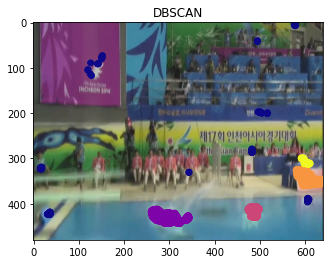

In [55]:
dbscan(np.array(my_sorted_coord),eps=10, min_samples=40)
plt.imshow(result_white)
plt.imshow(img)

[[ 15 321]
 [ 15 322]
 [ 15 323]
 ...
 [637 349]
 [637 350]
 [637 351]]
NUMBER OF CLUSTERS: 4
NUMBER OF NOISES: 119
[-1 -1 -1 ...  2  2  2]
[1351  387  920   75]
[0]
        0    1
0     260  416
1     260  417
2     260  418
3     260  419
4     261  415
...   ...  ...
1346  343  429
1347  343  430
1348  343  431
1349  343  432
1350  344  431

[1351 rows x 2 columns]
                 0            1
count  1351.000000  1351.000000
mean    292.787565   429.578090
std      19.551452     7.408579
min     260.000000   412.000000
25%     276.000000   424.000000
50%     292.000000   430.000000
75%     307.000000   435.000000
max     344.000000   443.000000


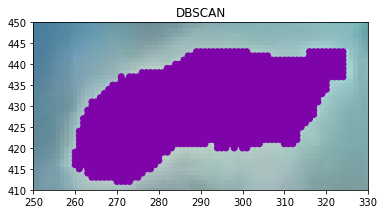

In [69]:
dbscan(np.array(my_sorted_coord),eps=10, min_samples=40)
plt.imshow(img)

plt.ylim([410,450])
plt.xlim([250,330])

plt.show()
